# Import the required libraries

In [2]:
import pandas as pd
import numpy as np
import sys, os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Load datasets 

In [4]:
dbe = pd.read_csv('../data/benin-malanville.csv')
dsi = pd.read_csv('../data/sierraleone-bumbuna.csv')
dto = pd.read_csv('../data/togo-dapaong_qc.csv')

# Check DataTypes and missing values

## For Benin-Malanville dataset:

In [5]:
dbe.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [9]:
missing_values_benin = dbe.isnull().sum()
print("Missing Values in Benin-Malanville:")
missing_values_benin

Missing Values in Benin-Malanville:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

## For Sierra Leone-Bumbuna dataset:

In [6]:
dsi.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [10]:
missing_values_sierra = dsi.isnull().sum()
print("Missing Values in Sierra Leone-Bumbuna:")
missing_values_sierra

Missing Values in Sierra Leone-Bumbuna:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

## For Togo-Dapaong_qc dataset:

In [7]:
dto.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [11]:
missing_values_togo = dto.isnull().sum()
print("Missing Values in Togo-Dapaong_qc:")
missing_values_togo

Missing Values in Togo-Dapaong_qc:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

# Detect Negatives 

## For Benin-Malanville dataset:

In [12]:
negative_values_benin = dbe.loc[(dbe['GHI'] < 0) | (dbe['DNI'] < 0) | (dbe['DHI'] < 0)]
if not negative_values_benin.empty:
    print("Negative Values Detected in Benin-Malanville:")
    display(negative_values_benin)

Negative Values Detected in Benin-Malanville:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN


## For Sierra Leone-Bumbuna dataset:

In [13]:
negative_values_sierra = dsi.loc[(dsi['GHI'] < 0) | (dsi['DNI'] < 0) | (dsi['DHI'] < 0)]
if not negative_values_sierra.empty:
    print("Negative Values Detected in Sierra Leone-Bumbuna:")
    display(negative_values_sierra)

Negative Values Detected in Sierra Leone-Bumbuna:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN


## For Togo-Dapaong_qc dataset:

In [14]:
negative_values_togo = dto.loc[(dto['GHI'] < 0) | (dto['DNI'] < 0) | (dto['DHI'] < 0)]
if not negative_values_togo.empty:
    print("Negative Values Detected in Togo-Dapaong_qc:")
    display(negative_values_togo)

Negative Values Detected in Togo-Dapaong_qc:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525596,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525597,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,NaN
525598,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN


# calculate summary statistics for each dataset:

## For Benin-Malanville dataset:

In [15]:
summary_stats_benin = dbe.describe()
summary_stats_benin

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


## For Sierra Leone-Bumbuna dataset:

In [16]:
summary_stats_sierra = dsi.describe()
summary_stats_sierra

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


## For Togo-Dapaong_qc dataset:

In [17]:
summary_stats_togo = dto.describe()
summary_stats_togo

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


# check for duplicates 

## For Benin-Malanville dataset:

In [18]:
duplicates_benin = dbe[dbe.duplicated()]
if not duplicates_benin.empty:
    print("Duplicate Entries Detected in Benin-Malanville:")
    display(duplicates_benin)
else:
    print("No Duplicate Entries Found in Benin-Malanville.")

No Duplicate Entries Found in Benin-Malanville.


## For Sierra Leone-Bumbuna dataset:

In [21]:
duplicates_sierra = dsi[dsi.duplicated()]
if not duplicates_sierra.empty:
    print("Duplicate Entries Detected in Sierra Leone-Bumbuna:")
    display(duplicates_sierra)
else:
    print("No Duplicate Entries Found in Sierra Leone-Bumbuna.")

No Duplicate Entries Found in Sierra Leone-Bumbuna.


## For Togo-Dapaong_qc dataset:

In [22]:
duplicates_togo = dto[dto.duplicated()]
if not duplicates_togo.empty:
    print("Duplicate Entries Detected in Togo-Dapaong_qc:")
    display(duplicates_togo)
else:
    print("No Duplicate Entries Found in Togo-Dapaong_qc.")

No Duplicate Entries Found in Togo-Dapaong_qc.


# correlation analysis

## For Benin-Malanville dataset:

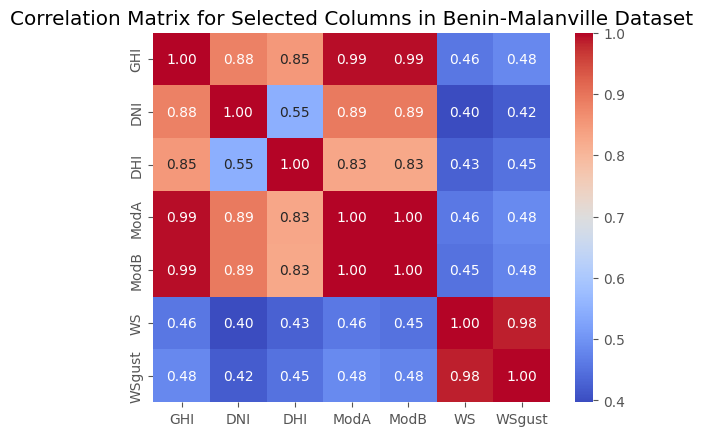

In [23]:
columns_of_interest_benin = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
correlation_benin_specific = dbe[columns_of_interest_benin].corr()
sns.heatmap(correlation_benin_specific, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Selected Columns in Benin-Malanville Dataset")
plt.show()

## For Sierra Leone-Bumbuna dataset:

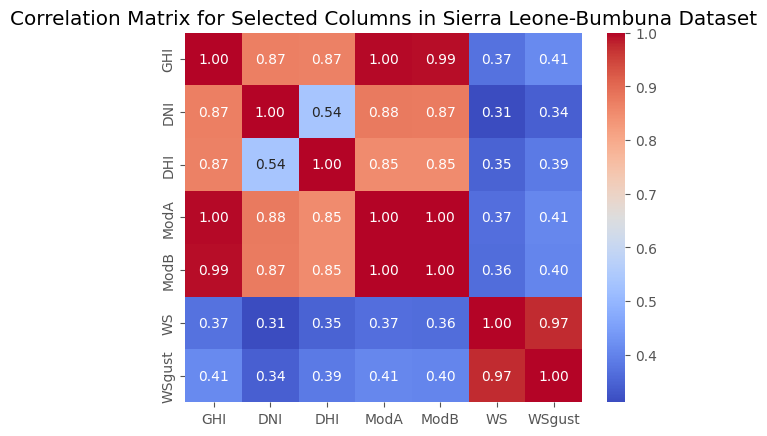

In [24]:
columns_of_interest_sierra = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
correlation_sierra_specific = dsi[columns_of_interest_sierra].corr()
sns.heatmap(correlation_sierra_specific, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Selected Columns in Sierra Leone-Bumbuna Dataset")
plt.show()

## For Togo-Dapaong_qc dataset:

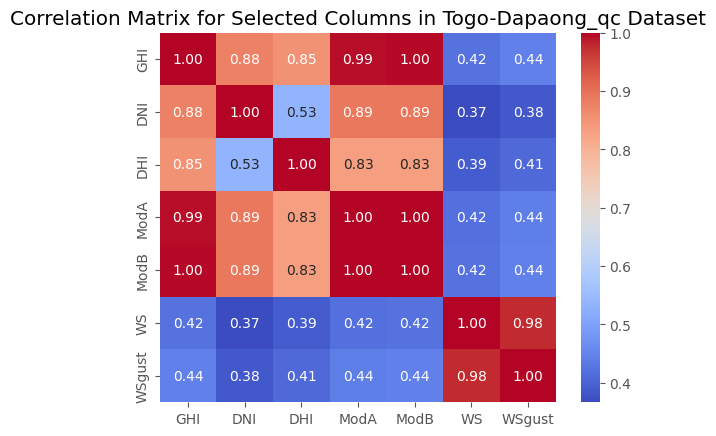

In [25]:
columns_of_interest_togo = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
correlation_togo_specific = dto[columns_of_interest_togo].corr()
sns.heatmap(correlation_togo_specific, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Selected Columns in Togo-Dapaong_qc Dataset")
plt.show()

# Time series Analysis

## For Benin-Malanville dataset:

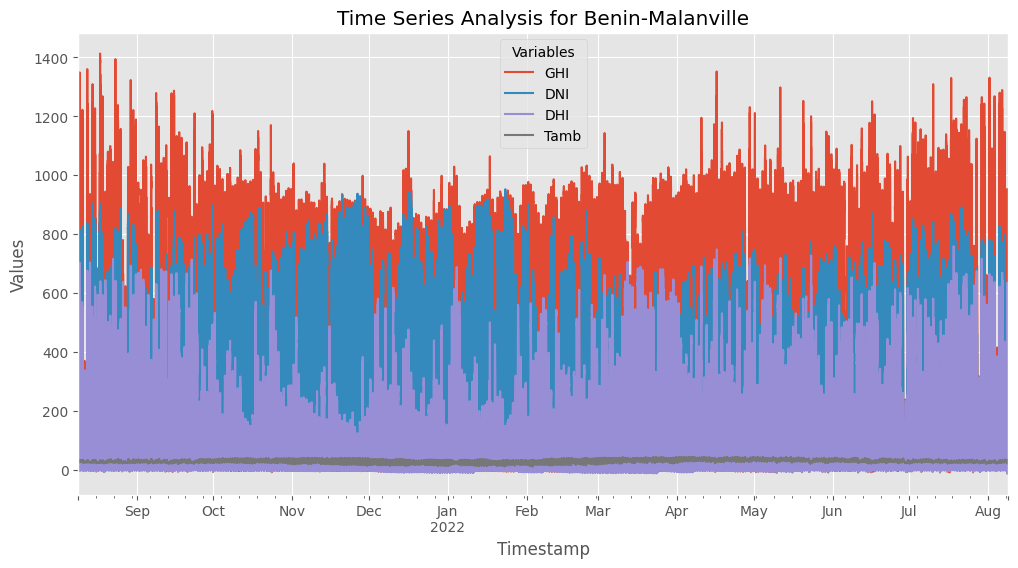

In [26]:

dbe['Timestamp'] = pd.to_datetime(dbe['Timestamp'])
dbe.set_index('Timestamp', inplace=True)
dbe[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 6))
plt.title("Time Series Analysis for Benin-Malanville")
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend(title='Variables')
plt.show()

## For Sierra Leone-Bumbuna dataset:

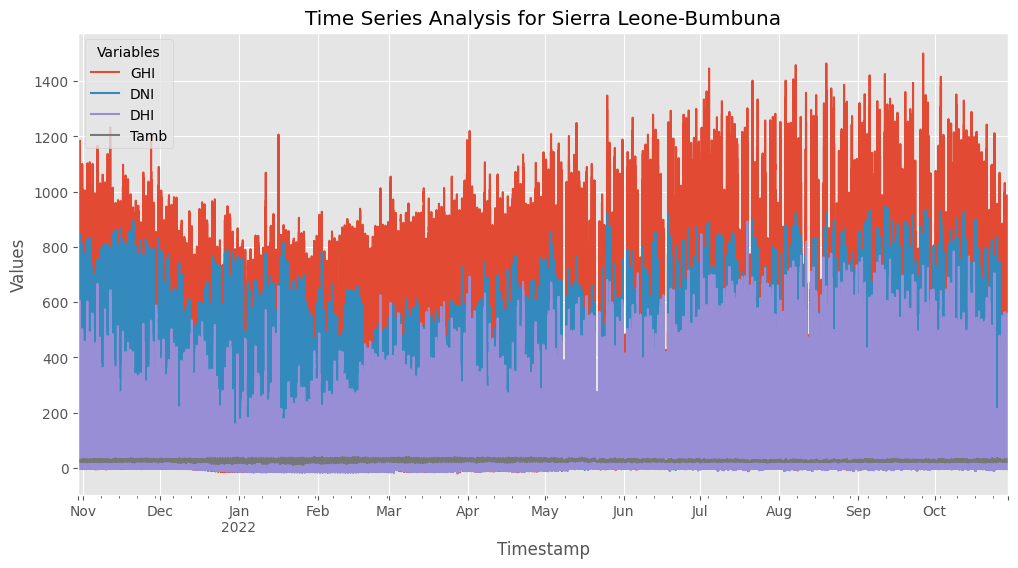

In [27]:

dsi['Timestamp'] = pd.to_datetime(dsi['Timestamp'])
dsi.set_index('Timestamp', inplace=True)

dsi[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 6))
plt.title("Time Series Analysis for Sierra Leone-Bumbuna")
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend(title='Variables')
plt.show()

## For Togo-Dapaong_qc dataset:

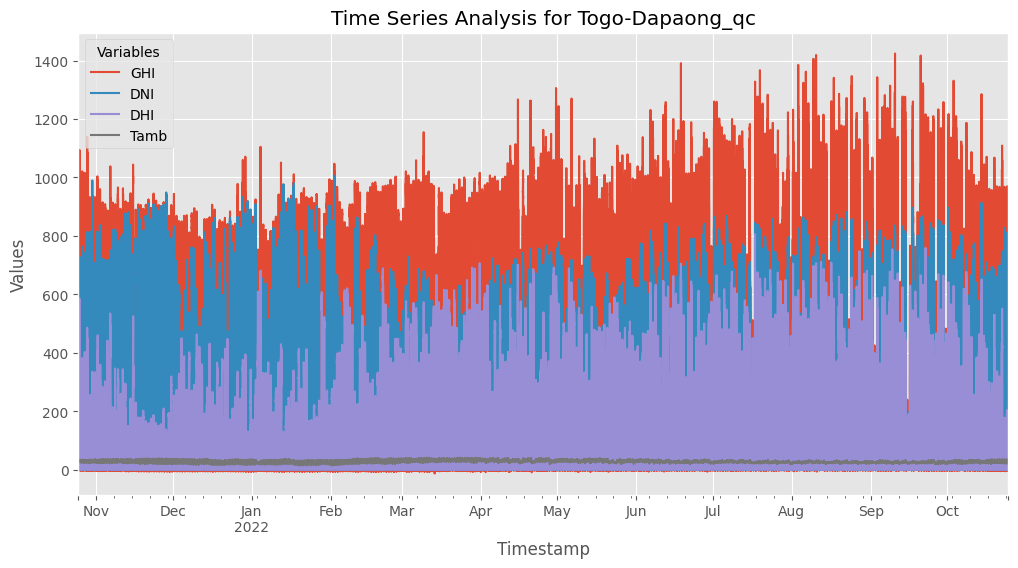

In [28]:

dto['Timestamp'] = pd.to_datetime(dto['Timestamp'])
dto.set_index('Timestamp', inplace=True)

dto[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 6))
plt.title("Time Series Analysis for Togo-Dapaong_qc")
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend(title='Variables')
plt.show()

# Correlation Analysis GHI vs Tamb

## Correlation Analysis for Benin-Malanville

Correlation Analysis for Benin-Malanville


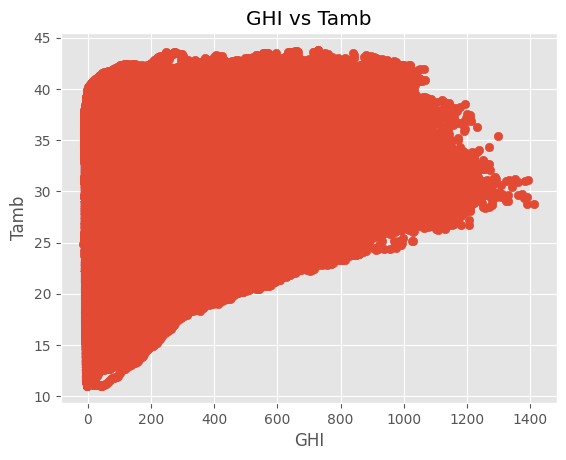

In [30]:
plt.scatter(dbe['GHI'], dbe['Tamb'])
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb')
print("Correlation Analysis for Benin-Malanville")
plt.show()

## Correlation Analysis for Sierraleone-Bumbuna

Correlation Analysis for Sierra Leone-Bumbuna


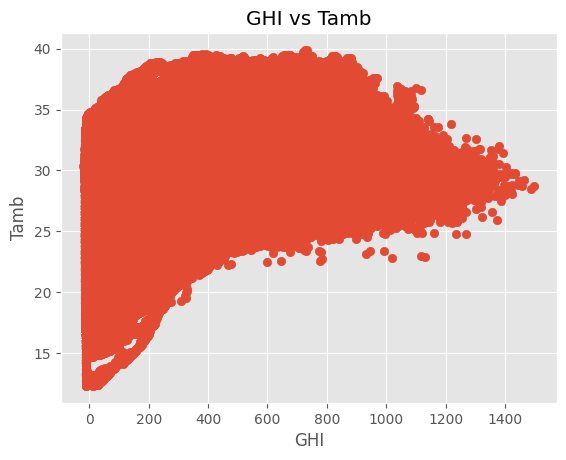

In [31]:
plt.scatter(dsi['GHI'], dsi['Tamb'])
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb')
print("Correlation Analysis for Sierra Leone-Bumbuna")
plt.show()

## Correlation Analysis for Togo-Dapaong_Qc

Correlation Analysis for Togo-Dapaong_qc


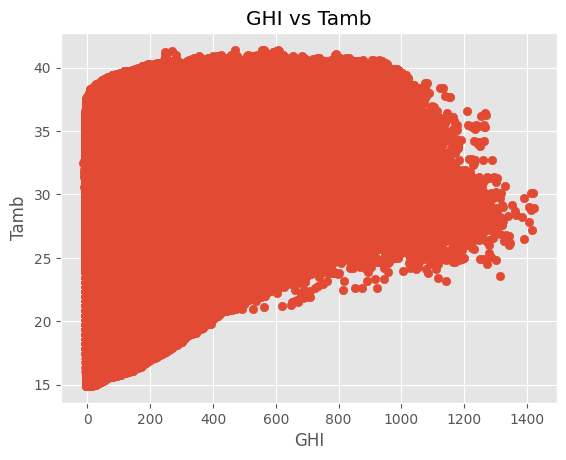

In [32]:
plt.scatter(dto['GHI'], dto['Tamb'])
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb')
print("Correlation Analysis for Togo-Dapaong_qc")
plt.show()

## Wind  Analysis

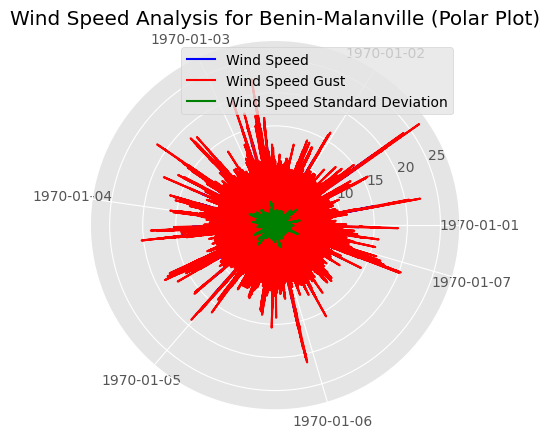

In [42]:
# Creating a polar plot for Wind Speed Analysis in Benin-Malanville
ax = plt.subplot(111, polar=True)
ax.plot(dbe['WS'], label='Wind Speed', color='blue')
ax.plot(dbe['WSgust'], label='Wind Speed Gust', color='red')
ax.plot(dbe['WSstdev'], label='Wind Speed Standard Deviation', color='green')

# Adding labels, title, and legend
plt.title('Wind Speed Analysis for Benin-Malanville (Polar Plot)')
plt.legend(loc='upper right')
plt.show()

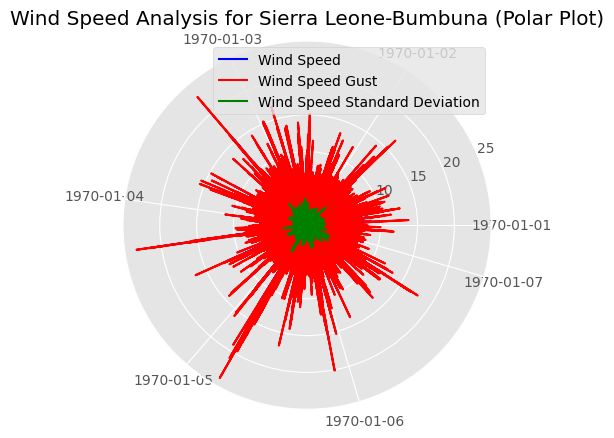

In [43]:

# Creating a polar plot for Wind Speed Analysis in Sierra Leone-Bumbuna
ax = plt.subplot(111, polar=True)
ax.plot(dsi['WS'], label='Wind Speed', color='blue')
ax.plot(dsi['WSgust'], label='Wind Speed Gust', color='red')
ax.plot(dsi['WSstdev'], label='Wind Speed Standard Deviation', color='green')

# Adding labels, title, and legend
plt.title('Wind Speed Analysis for Sierra Leone-Bumbuna (Polar Plot)')
plt.legend(loc='upper right')
plt.show()

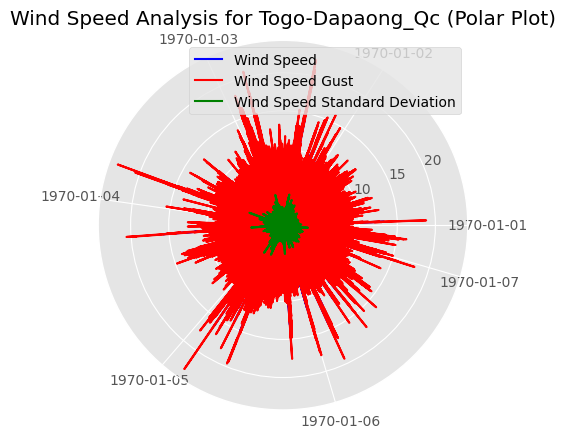

In [44]:
# Creating a polar plot for Wind Speed Analysis in Togo-Dapaong_Qc
ax = plt.subplot(111, polar=True)
ax.plot(dto['WS'], label='Wind Speed', color='blue')
ax.plot(dto['WSgust'], label='Wind Speed Gust', color='red')
ax.plot(dto['WSstdev'], label='Wind Speed Standard Deviation', color='green')

# Adding labels, title, and legend
plt.title('Wind Speed Analysis for Togo-Dapaong_Qc (Polar Plot)')
plt.legend(loc='upper right')
plt.show()

# Wind Direction Analysis

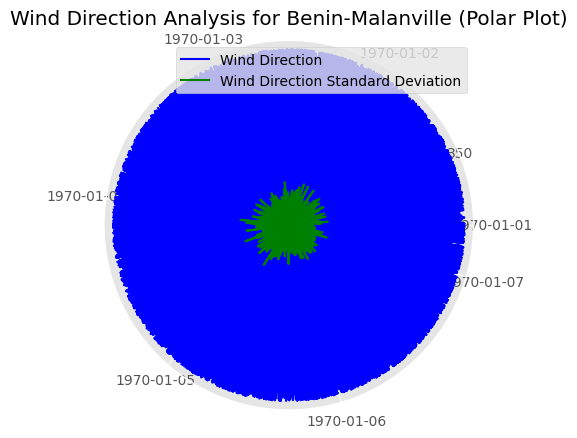

In [46]:
# Creating a polar plot for Wind Direction Analysis in Benin-Malanville
ax = plt.subplot(111, polar=True)
ax.plot(dbe['WD'], label='Wind Direction', color='blue')
ax.plot(dbe['WDstdev'], label='Wind Direction Standard Deviation', color='green')

# Adding labels, title, and legend
plt.title('Wind Direction Analysis for Benin-Malanville (Polar Plot)')
plt.legend(loc='upper right')
plt.show()

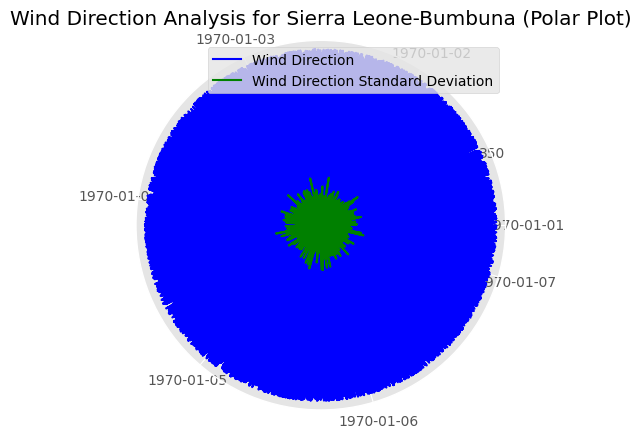

In [47]:
# Creating a polar plot for Wind Direction Analysis in Sierra Leone-Bumbuna
ax = plt.subplot(111, polar=True)
ax.plot(dsi['WD'], label='Wind Direction', color='blue')
ax.plot(dsi['WDstdev'], label='Wind Direction Standard Deviation', color='green')

# Adding labels, title, and legend
plt.title('Wind Direction Analysis for Sierra Leone-Bumbuna (Polar Plot)')
plt.legend(loc='upper right')
plt.show()

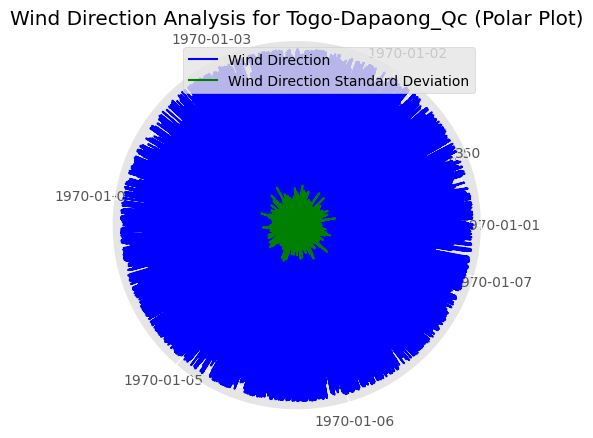

In [48]:
# Creating a polar plot for Wind Direction Analysis in Togo-Dapaong_Qc
ax = plt.subplot(111, polar=True)
ax.plot(dto['WD'], label='Wind Direction', color='blue')
ax.plot(dto['WDstdev'], label='Wind Direction Standard Deviation', color='green')

# Adding labels, title, and legend
plt.title('Wind Direction Analysis for Togo-Dapaong_Qc (Polar Plot)')
plt.legend(loc='upper right')
plt.show()

# Temperature

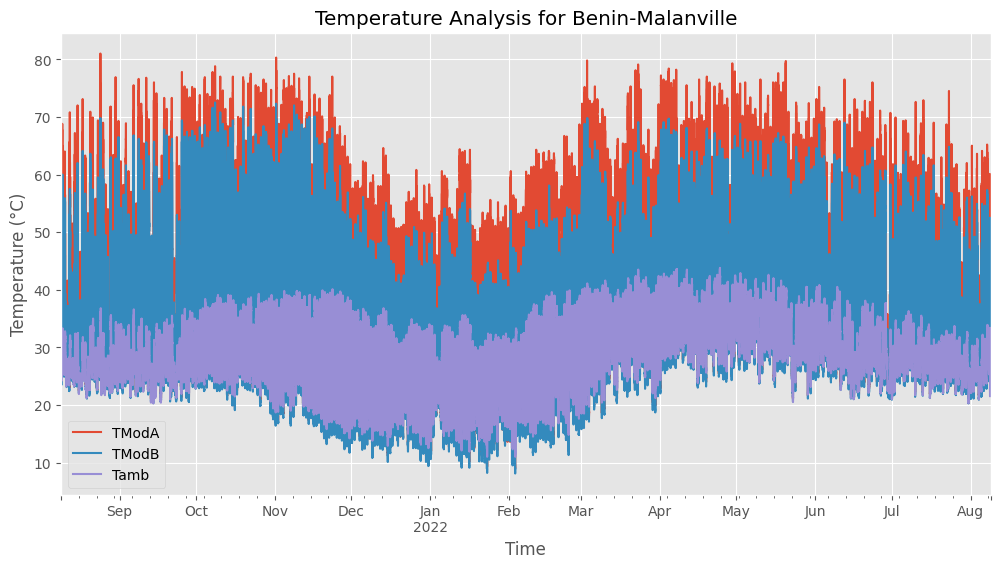

In [39]:
dbe[['TModA', 'TModB', 'Tamb']].plot(figsize=(12, 6))
plt.title('Temperature Analysis for Benin-Malanville')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.show()

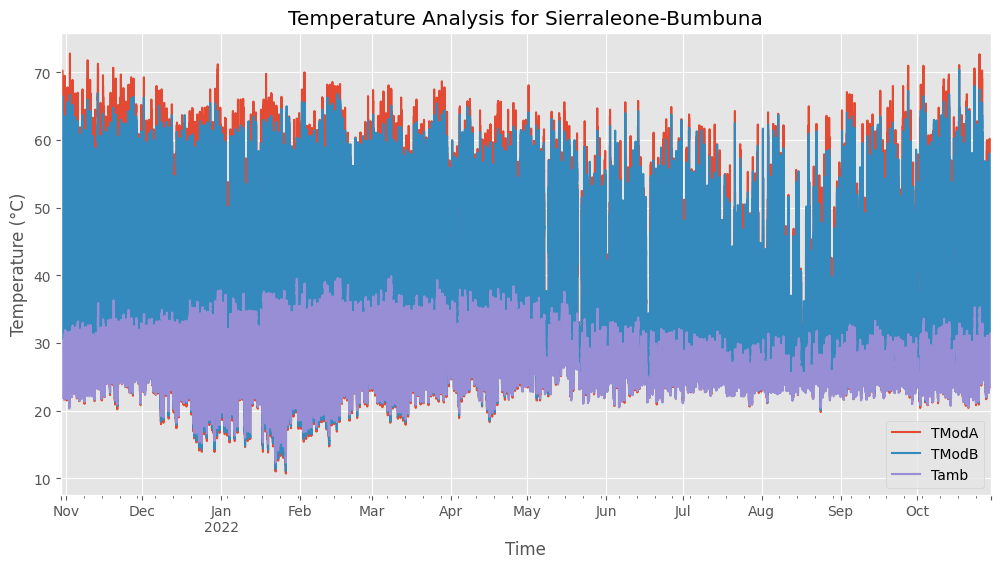

In [40]:
dsi[['TModA', 'TModB', 'Tamb']].plot(figsize=(12, 6))
plt.title('Temperature Analysis for Sierraleone-Bumbuna')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.show()

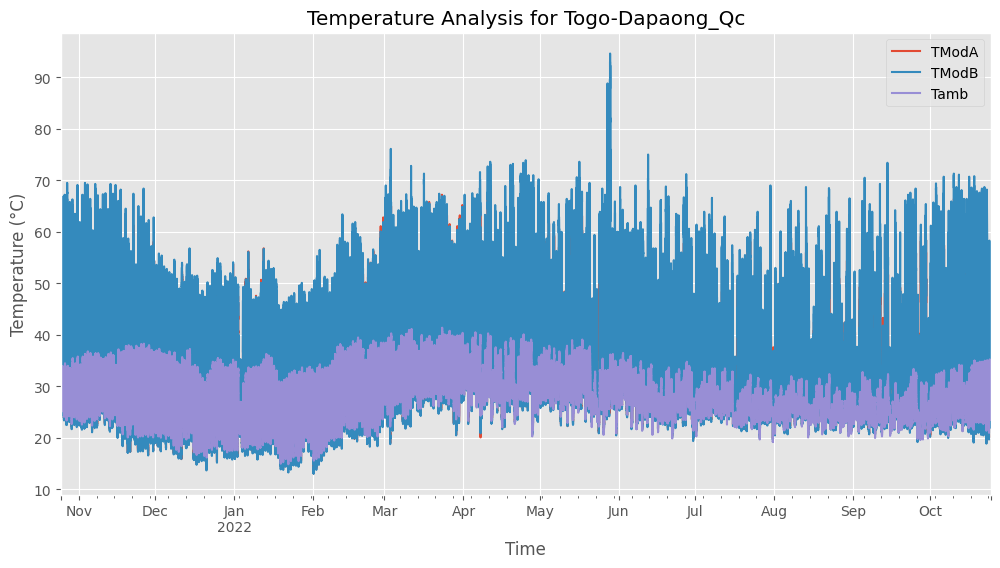

In [41]:
dto[['TModA', 'TModB', 'Tamb']].plot(figsize=(12, 6))
plt.title('Temperature Analysis for Togo-Dapaong_Qc')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.show()

# Histogram

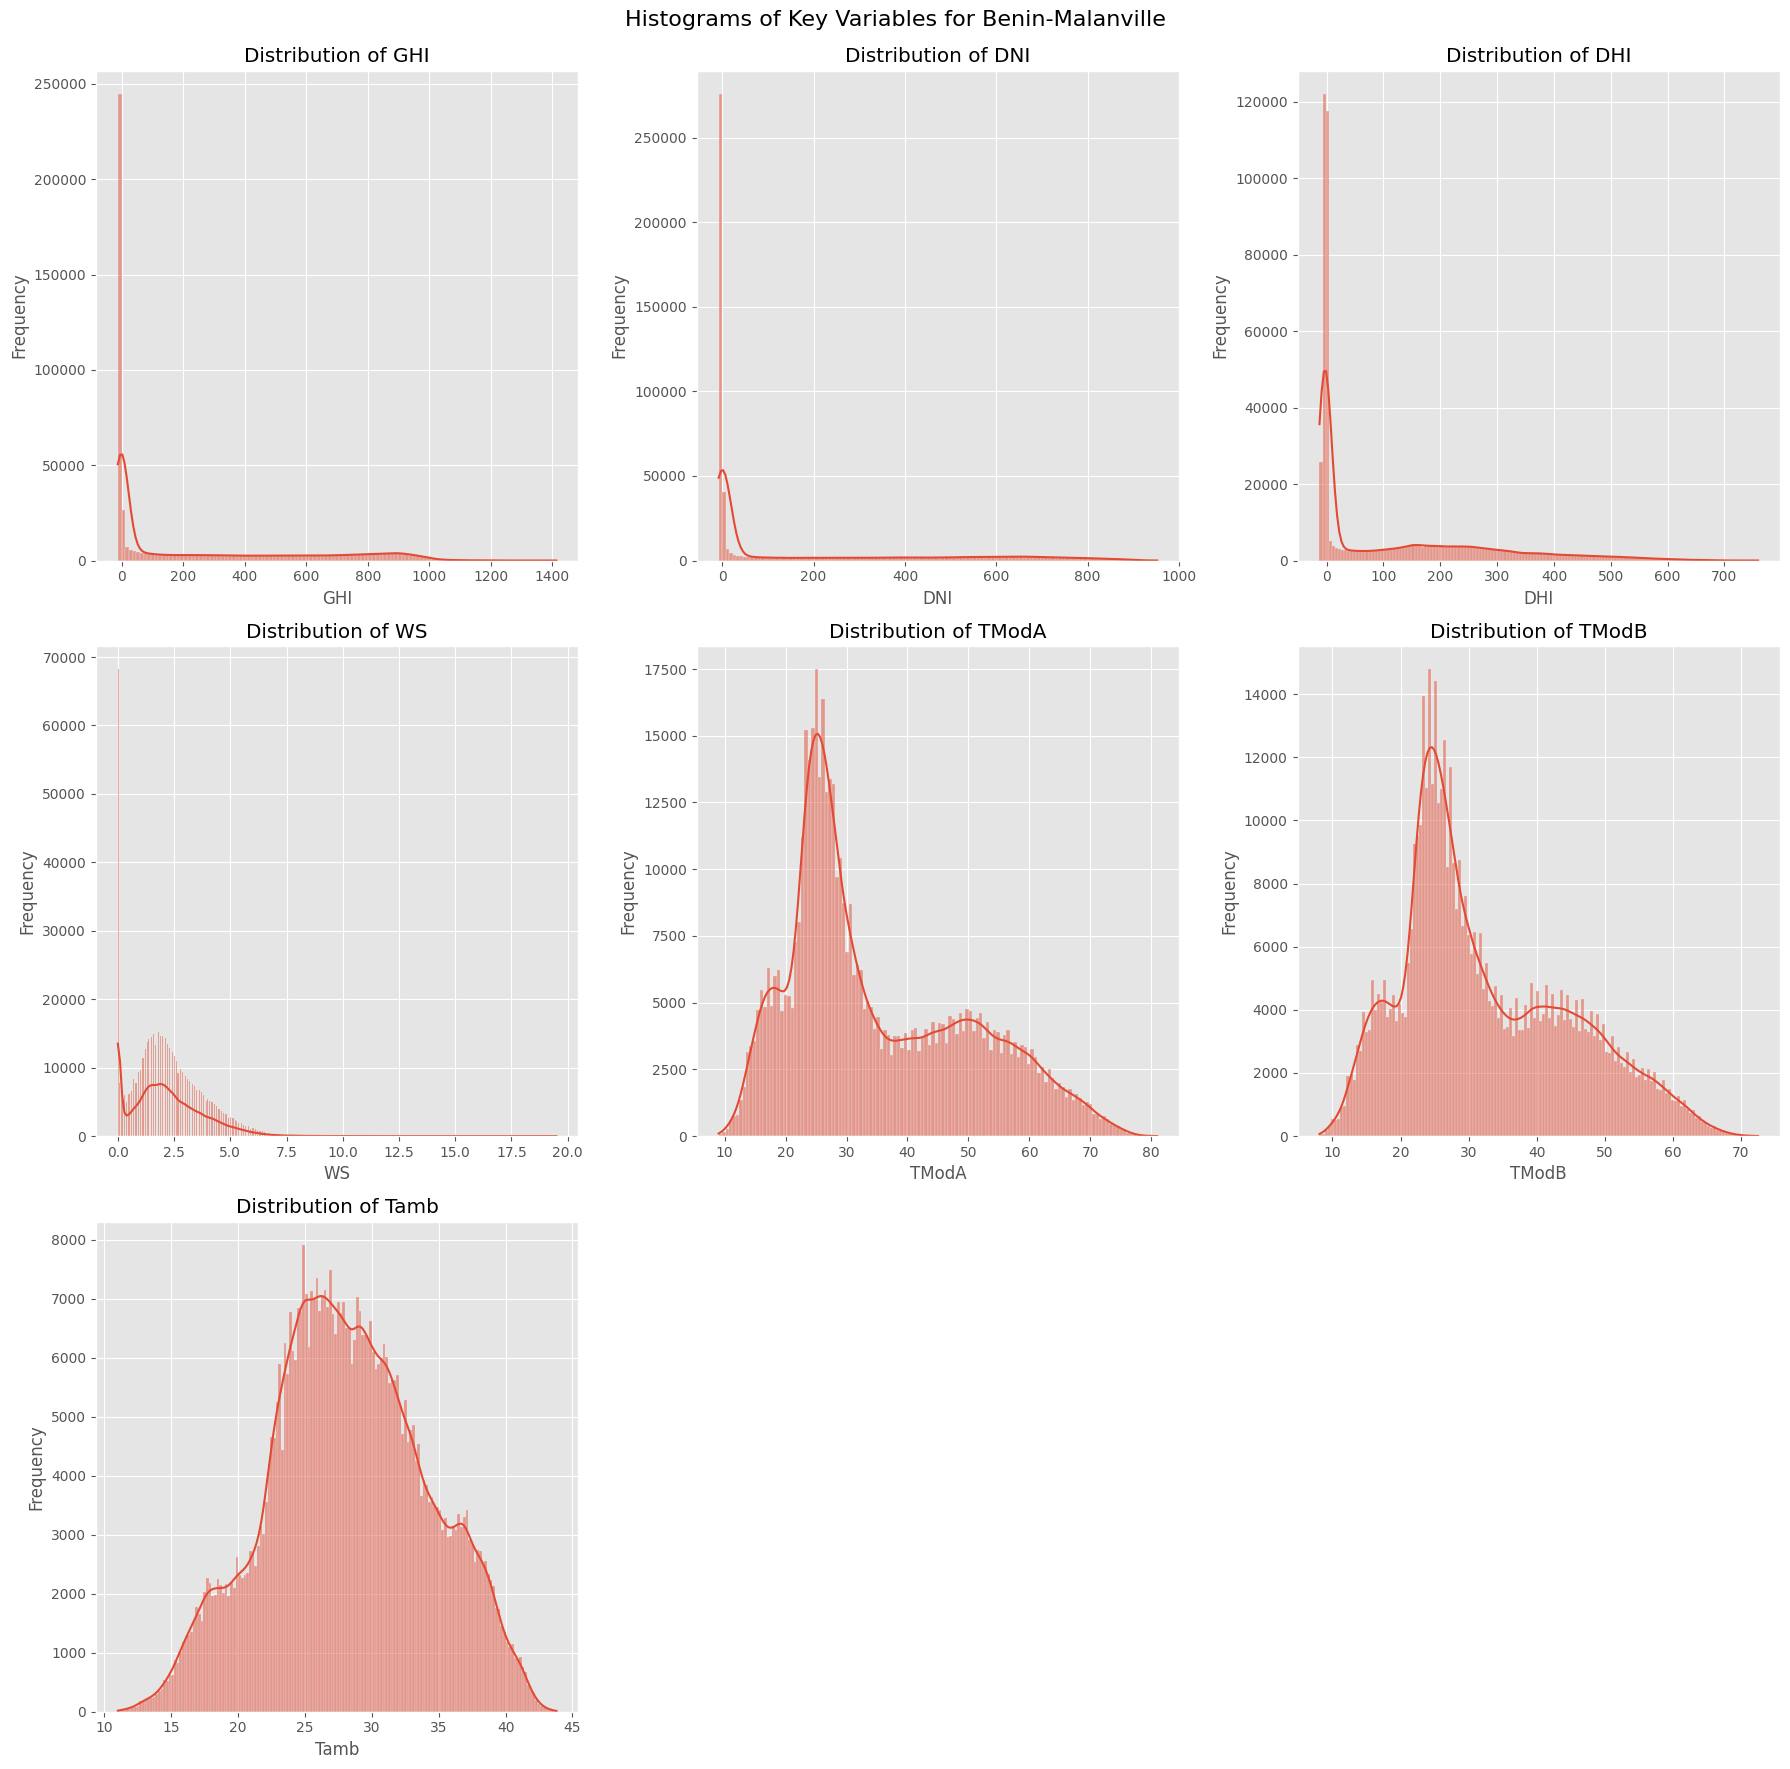

In [49]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB', 'Tamb']

# Calculate the number of rows needed
n_rows = (len(variables) + 2) // 3  # This will give us 3 columns and enough rows

# Set up the plot
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6 * n_rows))
fig.suptitle('Histograms of Key Variables for Benin-Malanville\n', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create histograms
for i, var in enumerate(variables):
    sns.histplot(data=dbe, x=var, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display
plt.tight_layout()
plt.show()

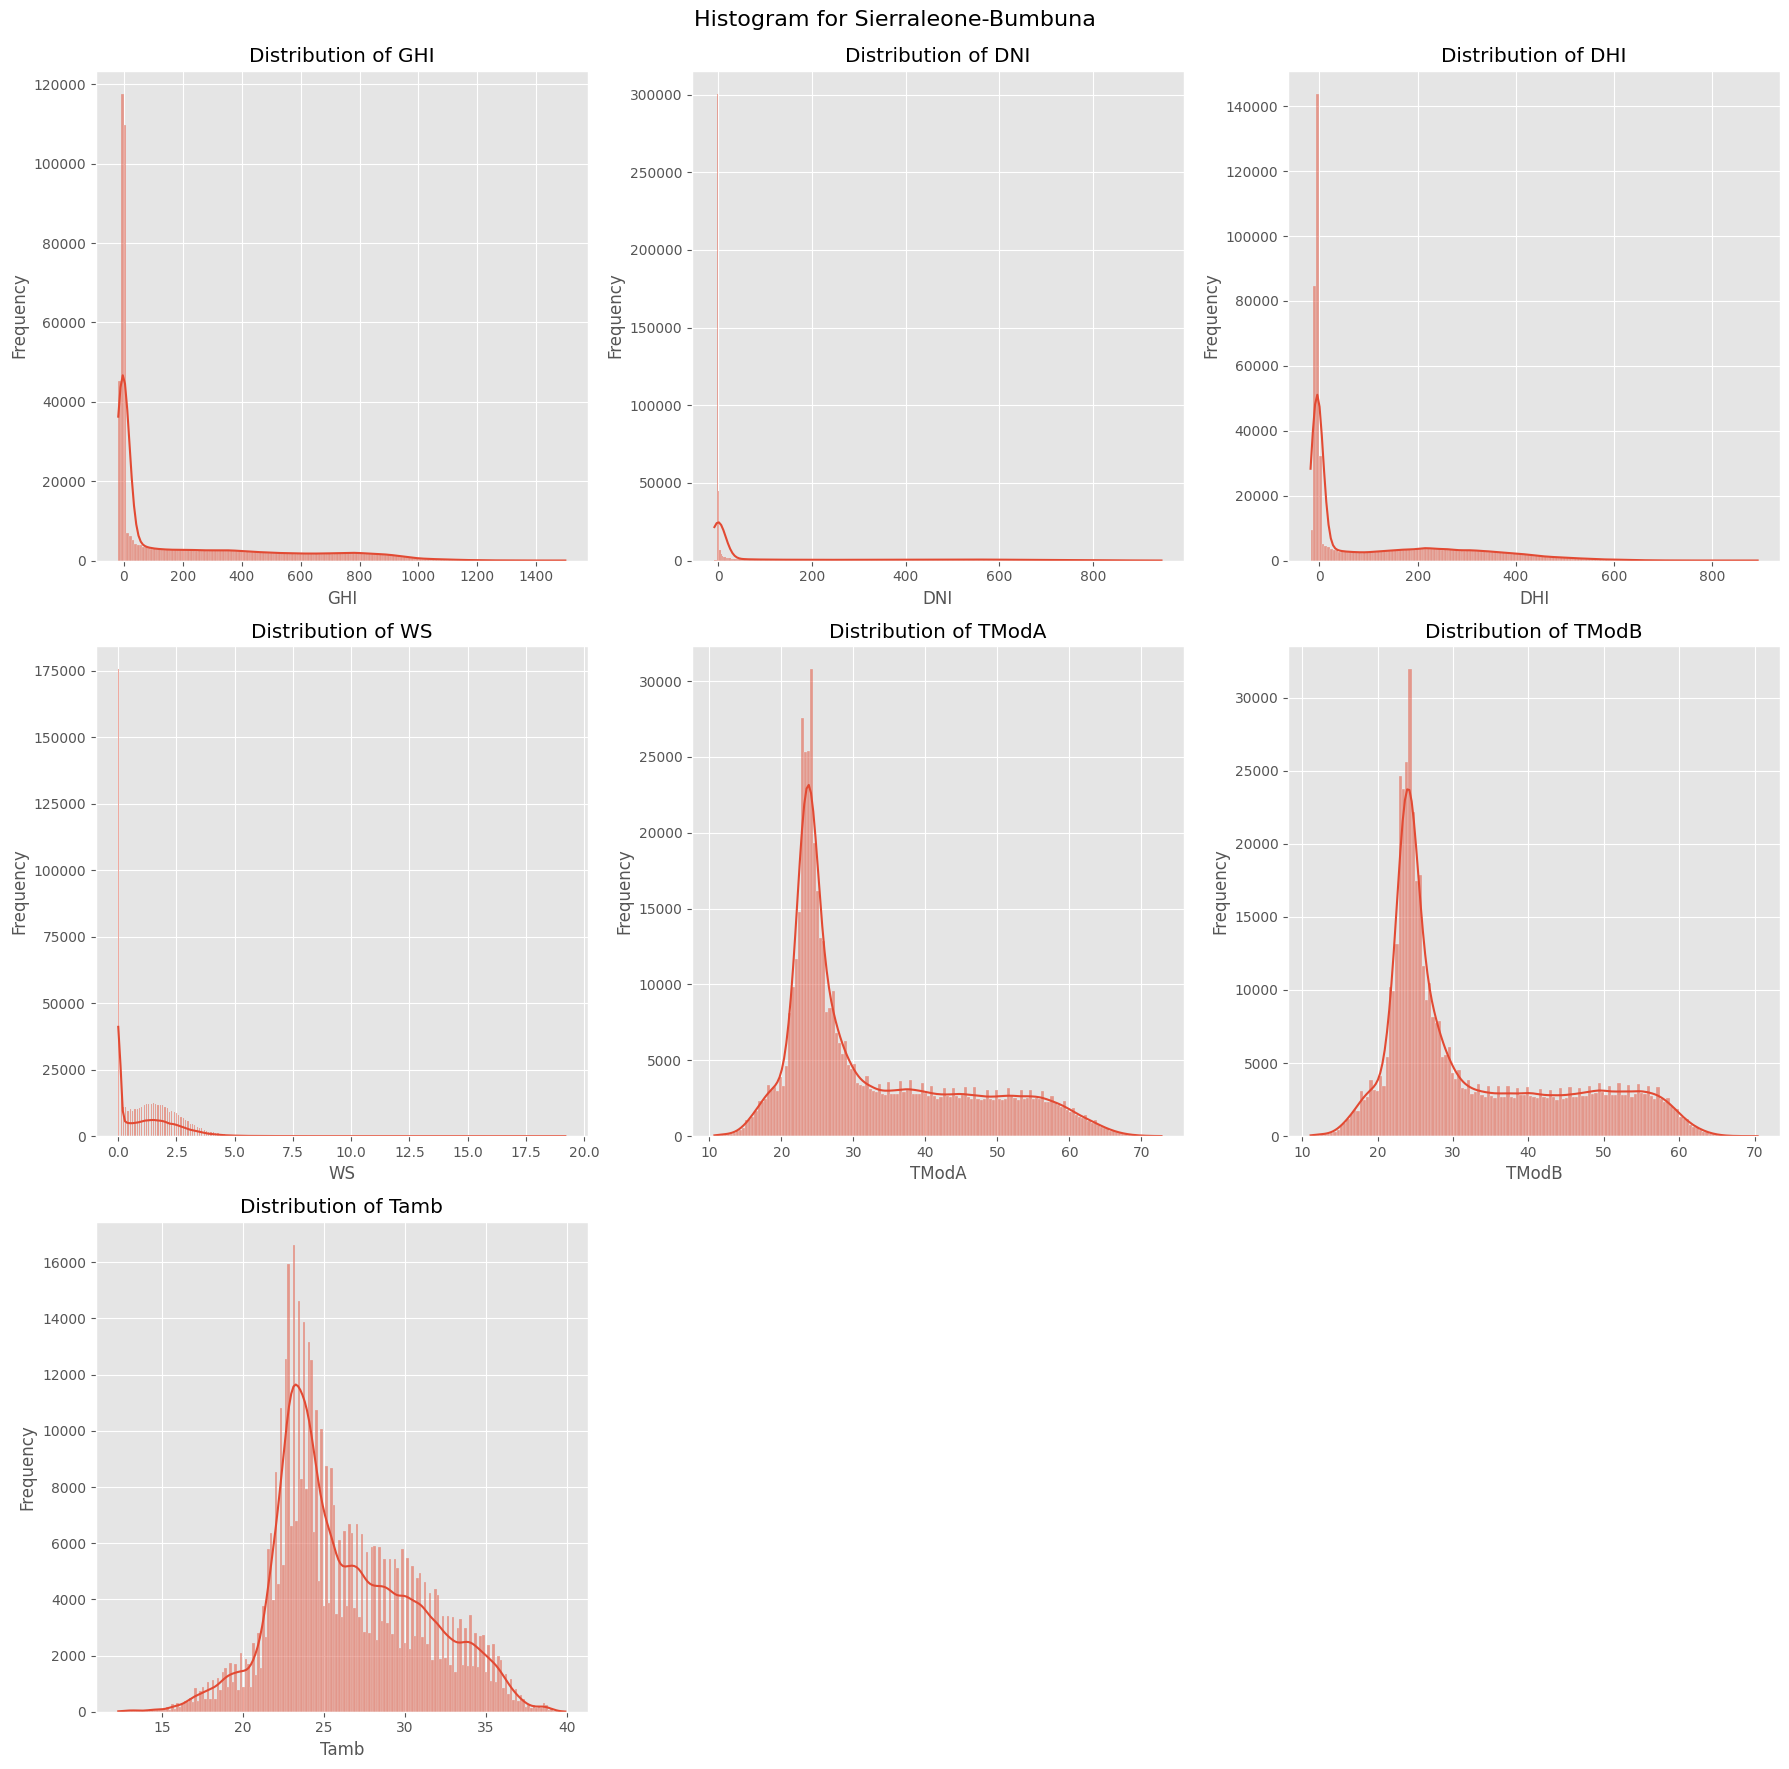

In [50]:
# List of variables to plot
variables = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB', 'Tamb']

# Calculate the number of rows needed
n_rows = (len(variables) + 2) // 3  # This will give us 3 columns and enough rows

# Set up the plot
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6 * n_rows))
fig.suptitle('Histogram for Sierraleone-Bumbuna\n', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create histograms
for i, var in enumerate(variables):
    sns.histplot(data=dsi, x=var, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display
plt.tight_layout()
plt.show()

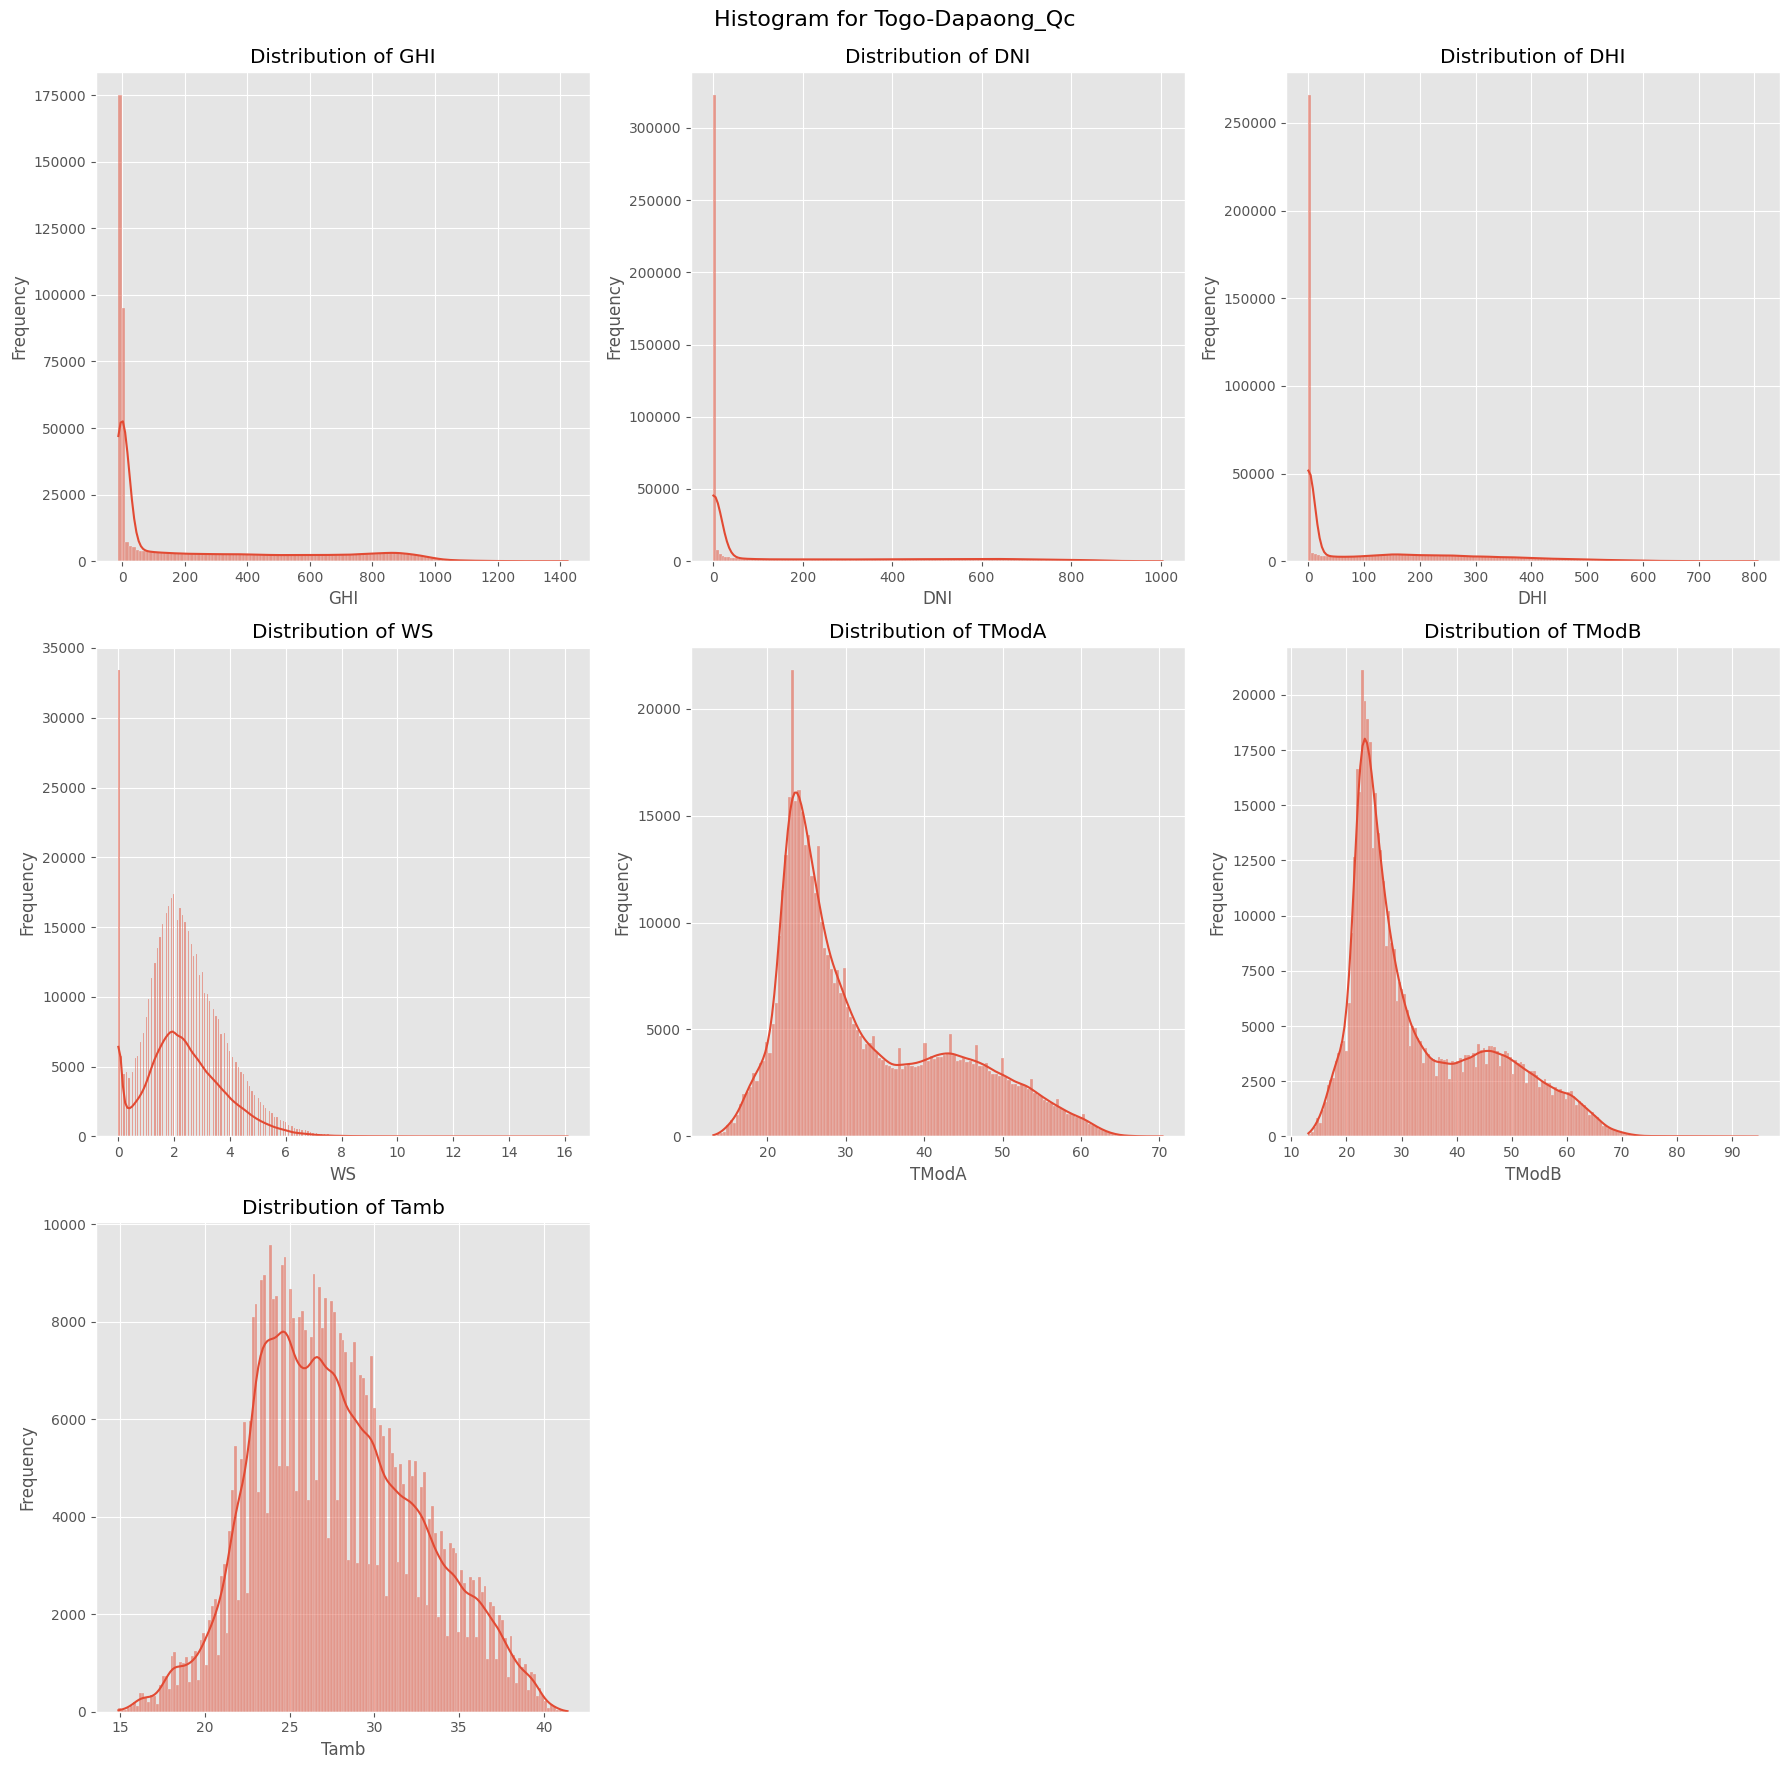

In [51]:
# List of variables to plot
variables = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB', 'Tamb']

# Calculate the number of rows needed
n_rows = (len(variables) + 2) // 3  # This will give us 3 columns and enough rows

# Set up the plot
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6 * n_rows))
fig.suptitle('Histogram for Togo-Dapaong_Qc\n', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create histograms
for i, var in enumerate(variables):
    sns.histplot(data=dto, x=var, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display
plt.tight_layout()
plt.show()

# z-score


In [53]:
# Calculate Z-scores for the datasets
dbe_zscores = (dbe - dbe.mean()) / dbe.std()
dsi_zscores = (dsi - dsi.mean()) / dsi.std()
dto_zscores = (dto - dto.mean()) / dto.std()

# Flag data points significantly different from the mean
flagged_dbe = dbe_zscores[(dbe_zscores > 2) | (dbe_zscores < -2)]
flagged_dsi = dsi_zscores[(dsi_zscores > 2) | (dsi_zscores < -2)]
flagged_dto = dto_zscores[(dto_zscores > 2) | (dto_zscores < -2)]

print("Z-Score Analysis for Benin-Malanville Dataset:")
print(flagged_dbe.head())

print("\n Z-Score Analysis for Sierra Leone-Bumbuna Dataset:")
print(flagged_dsi.head())

print("\n Z-Score Analysis for Togo-Dapaong_Qc Dataset:")
print(flagged_dto.head())

Z-Score Analysis for Benin-Malanville Dataset:
                     GHI  DNI  DHI  ModA  ModB  Tamb  RH  WS  WSgust  WSstdev  \
Timestamp                                                                       
2021-08-09 00:01:00  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
2021-08-09 00:02:00  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
2021-08-09 00:03:00  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
2021-08-09 00:04:00  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
2021-08-09 00:05:00  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   

                     WD  WDstdev  BP  Cleaning  Precipitation  TModA  TModB  \
Timestamp                                                                     
2021-08-09 00:01:00 NaN      NaN NaN       NaN            NaN    NaN    NaN   
2021-08-09 00:02:00 NaN      NaN NaN       NaN            NaN    NaN    NaN   
2021-08-09 00:03:00 NaN      NaN NaN       NaN            NaN    NaN 